# Training a network on the CIFAR10 dataset

We'll train a custom network on the cifar10 dataset. CIFAR10 is a dataset of images categorized into 10 categories. Goal of the network is to classify the images into the correct category.

Let's start with loading any libraries you need.

In [19]:
# Load libraries you need here
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Load the data from the CIFAR10. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes.
Info can be found in the documentation: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Use a portion of the training data as validation data. Do you need to do any preprocessing?

# Normalizing 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [22]:
x_train.shape, x_val.shape

((45000, 32, 32, 3), (5000, 32, 32, 3))

Create your model using conv2D layers, some type of pooling and finish with a dense network.

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train your model. Since the dataset is so big not a lot of epochs should be needed to start seeing results.

In [42]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1407/1407 [==============================] - 26s 17ms/step - loss: 1.4392 - accuracy: 0.4825 - val_loss: 1.1996 - val_accuracy: 0.5696
Epoch 2/10
1407/1407 [==============================] - 26s 18ms/step - loss: 1.0695 - accuracy: 0.6247 - val_loss: 1.0005 - val_accuracy: 0.6422
Epoch 3/10
1407/1407 [==============================] - 26s 18ms/step - loss: 0.9231 - accuracy: 0.6771 - val_loss: 1.0275 - val_accuracy: 0.6400
Epoch 4/10
1407/1407 [==============================] - 23s 17ms/step - loss: 0.8249 - accuracy: 0.7123 - val_loss: 0.9077 - val_accuracy: 0.6860
Epoch 5/10
1407/1407 [==============================] - 27s 19ms/step - loss: 0.7325 - accuracy: 0.7453 - val_loss: 0.8919 - val_accuracy: 0.6908
Epoch 6/10
1407/1407 [==============================] - 26s 19ms/step - loss: 0.6607 - accuracy: 0.7699 - val_loss: 0.8671 - val_accuracy: 0.6984
Epoch 7/10
1407/1407 [==============================] - 26s 18ms/step - loss: 0.5882 - accuracy: 0.7963 - val_loss: 0.8818 -

Visualize the model performance

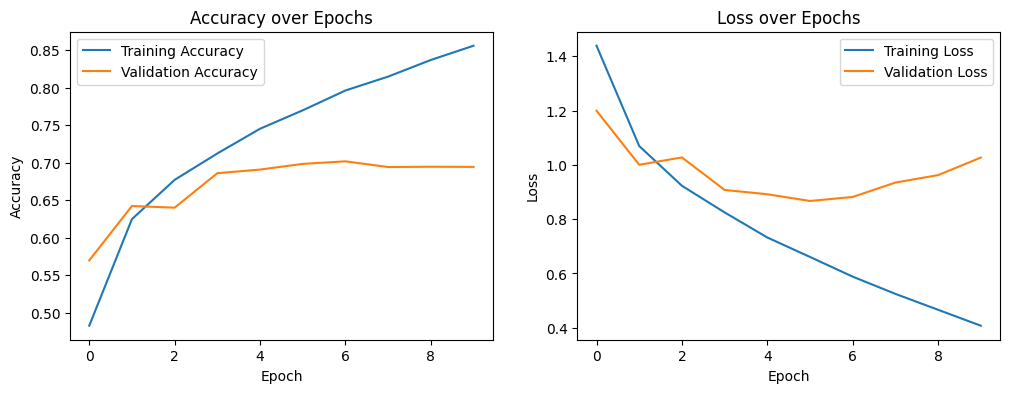

In [43]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Evaluate on the test set

In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# prints and plots you might need to evaluate.


313/313 - 1s - loss: 0.8874 - accuracy: 0.7186 - 1s/epoch - 4ms/step


# Excercise
Experiment with different architectures and try to find a model that performs well.

### Testing additional layers & dropout